**Task 1: Data loading and Data Analysis**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Load the data file into a dataframe object : df
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv")
# Display the first 5 observation of the dataset
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [57]:
# Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

All features are the **int** data type except status_type and status_published.


Column1 - Column4 were deliberately added because these columns have no titles and a lot of empty values.

In [58]:
# Perform EDA viz.
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [59]:
# Is there any missing values in each column of the provided dataset
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Column1, Column2, Column3, Column4 have many NaN values. They can be deleted later.

In [60]:
# Display all the unique status_type of the dataframe
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [61]:
# Convert categorical variable, i.e., status_type into numerical representation using a label encoder

# Converting type of columns to 'category'
df['status_type'] = df['status_type'].astype('category')

# Assigning numerical values and storing in another column
df['status_type'] = df['status_type'].cat.codes

In [62]:
# Now all the unique status_type of the dataframe have numerical representation
df.status_type.unique()

array([3, 1, 0, 2], dtype=int8)

**Task 2: Feature Scaling**

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
min_max_scaler = MinMaxScaler()
df[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']] = pd.DataFrame(min_max_scaler.fit_transform(df[['num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']]))

In [65]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,NaN,NaN,NaN,NaN
1,2,1,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
2,3,3,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,NaN,NaN,NaN,NaN
3,4,1,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN
4,5,1,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN


In [72]:
# Delete multiple columns from the dataframe
df = df.drop(["status_published", "Column1", "Column2","Column2","Column3","Column4"], axis=1)

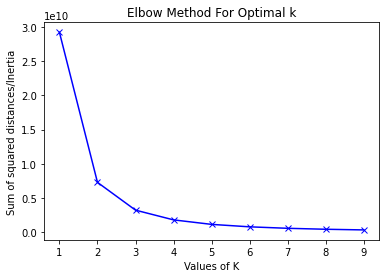

In [73]:
# Elbow Curve Method
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
K = range(1,10)

for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

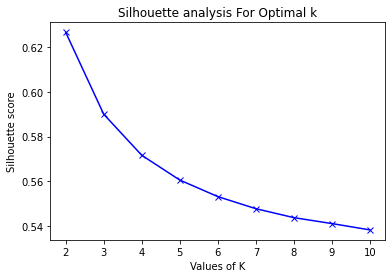

In [76]:
# Verify optimal number of clusers on the basis of silhouette scores

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

So, the optimal = 2

*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score

I am not sure we can use here  rand_score or adjusted_rand_score as the ground truth class labels were not provided. It is possible to build two clusterisers and compare them with each other, but this is not set as a task in the second part of this Assignment.

**Task 3: Perform PCA on Fruit Dataset**

In [87]:
# Load the data file into a dataframe object : df
df_fruit = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")
# Display the first 5 observation of the dataset
df_fruit.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [89]:
# Use PCA to find the first two principal components of the fruit dataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
df_fruit_normalized = StandardScaler().fit(df_fruit).transform(df_fruit)  

In [90]:
pca = PCA(n_components = 2).fit(df_fruit_normalized)

X_pca = pca.transform(df_fruit_normalized)
print(df_fruit.shape, X_pca.shape)

(59, 5) (59, 2)


In [91]:
# Analysis - perform PCA with 4 components

pca_four = PCA(n_components = 4).fit(df_fruit_normalized)

X_pca_four = pca.transform(df_fruit_normalized)
print(df_fruit.shape, X_pca_four.shape)

(59, 5) (59, 2)


In [94]:
# Print their explained variance_ratio
# Percentage of variance explained by each of the selected components.
print(pca_four.explained_variance_ratio_)

[0.46714596 0.31485849 0.16064024 0.04624694]
